# 0. Simulate real signal data

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

%matplotlib inline
%config InlineBackend.figure_format='retina'

## 0.1 Pure signal data

Text(0, 0.5, 'amplitude')

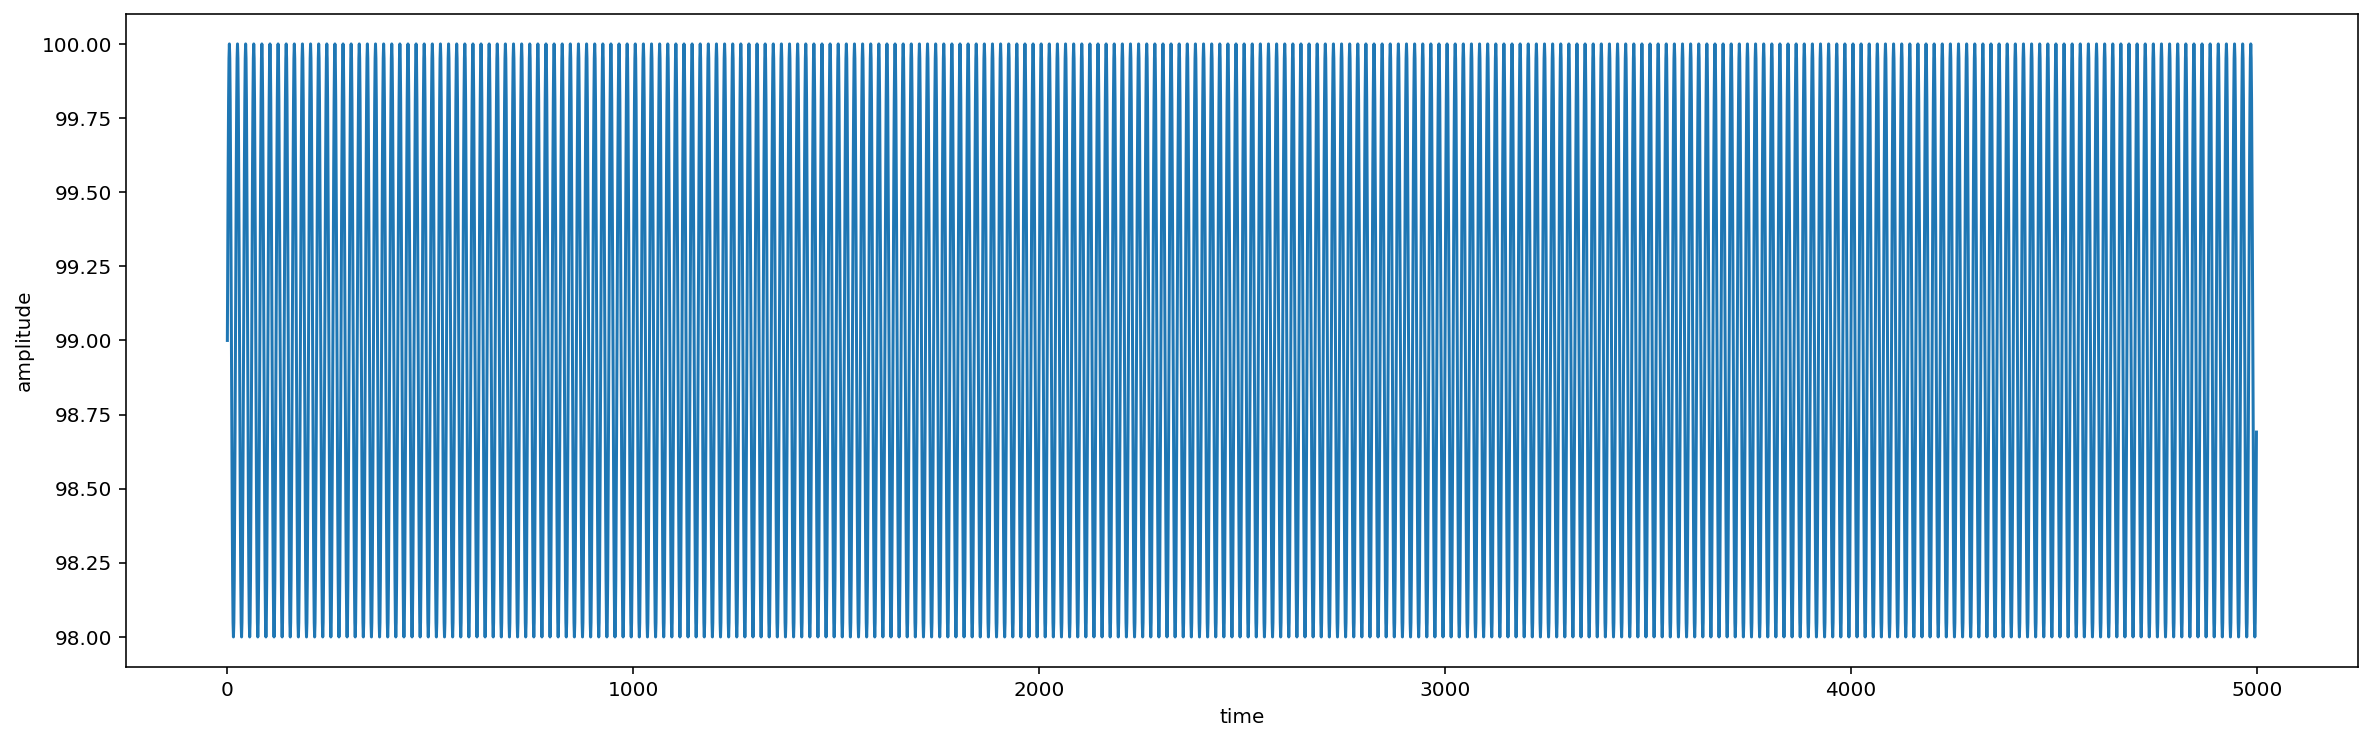

In [97]:
# define parameters
time=5000
x =np.arange(time)
freq = 10

# sine wave
ps=np.sin(2*np.pi*freq*(x/200))+99

plt.figure(figsize=(20,6))
plt.plot(x,ps)
plt.xlabel('time')
plt.ylabel('amplitude')

## 0.2 Noise form

Text(0, 0.5, 'amplitude')

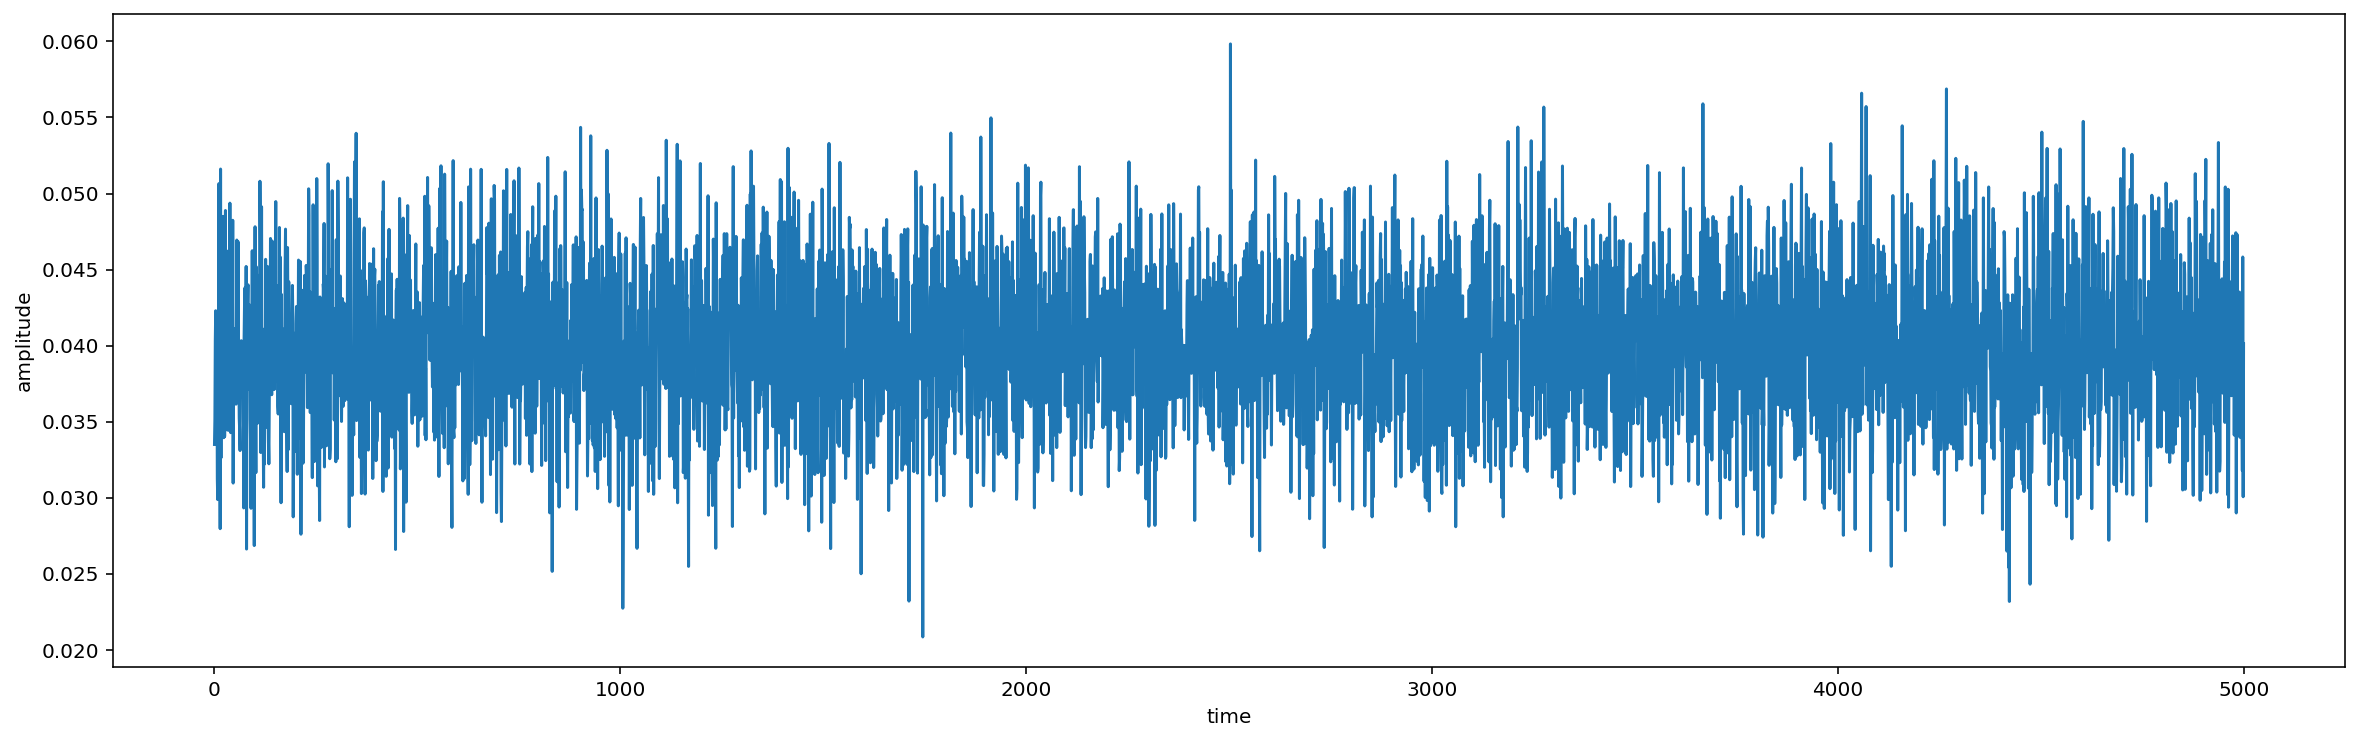

In [135]:
#rd=np.random.normal(size=time,)
#nf=(np.max(rd)-rd)/100
nf=np.random.normal(.04,.005,time)

plt.figure(figsize=(20,6))
plt.plot(nf)
plt.xlabel('time')
plt.ylabel('amplitude')

## 0.3 Atmos signal data  = Pure + Noise

Text(0, 0.5, 'amplitude')

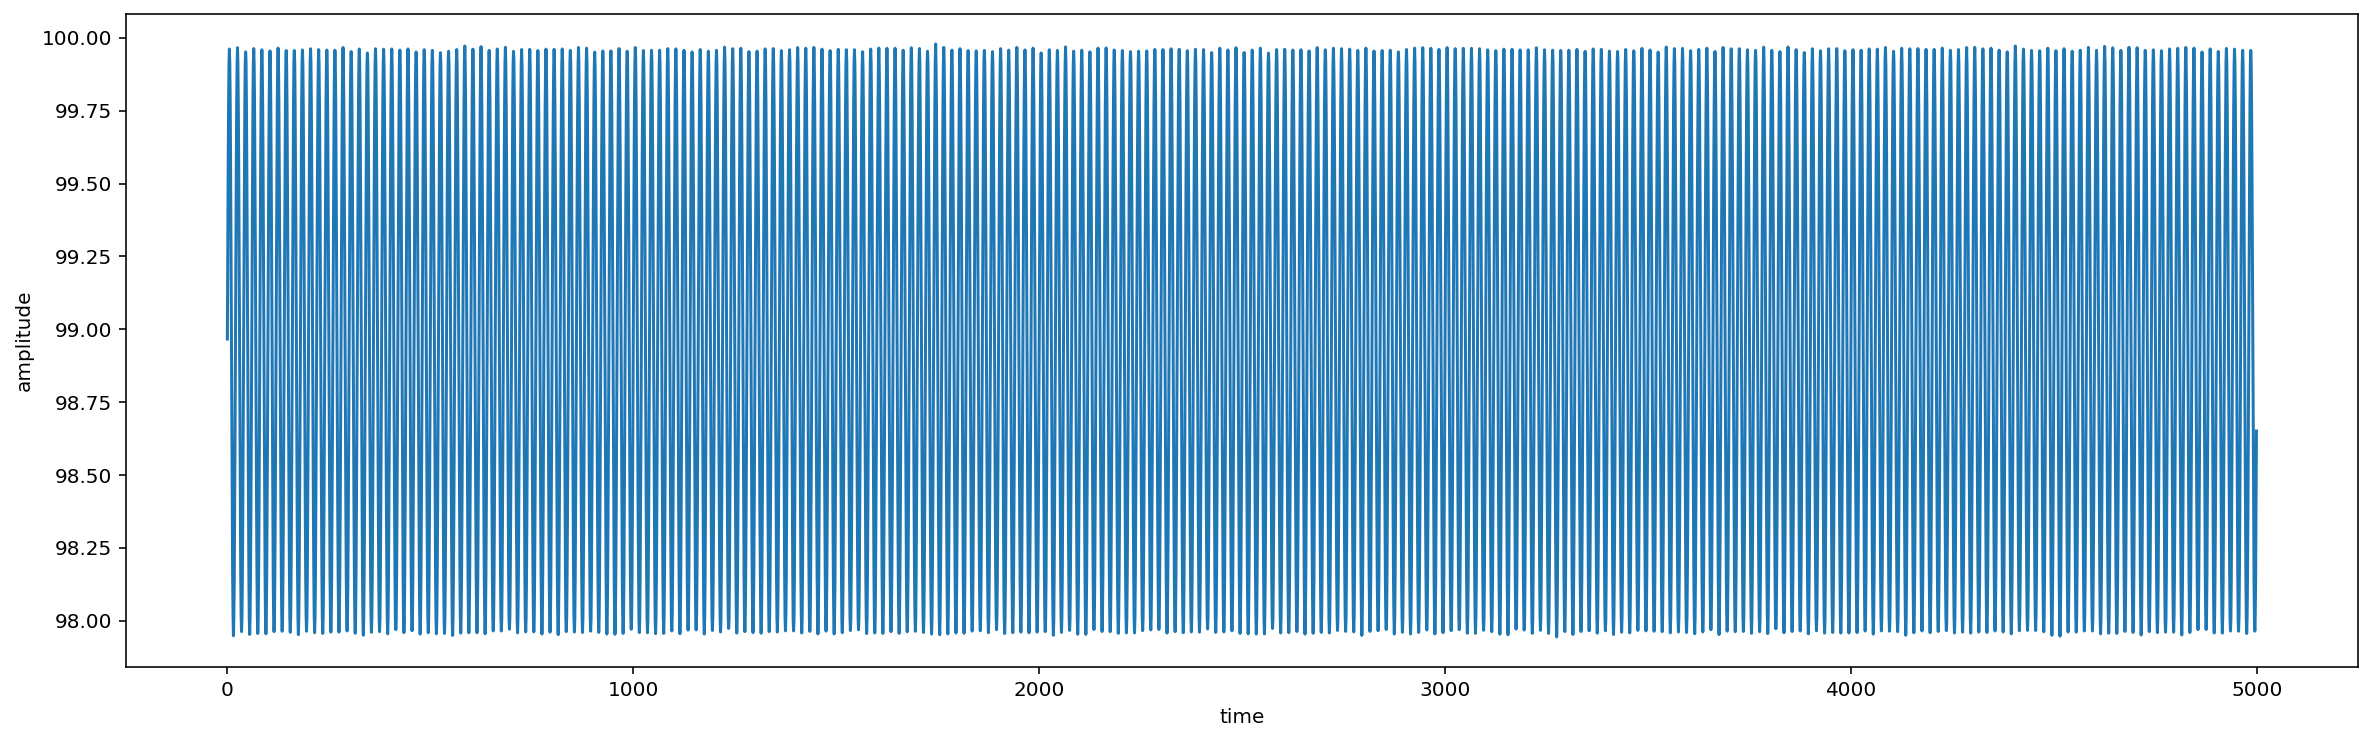

In [136]:
at = -nf+ps

plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

(0, 100)

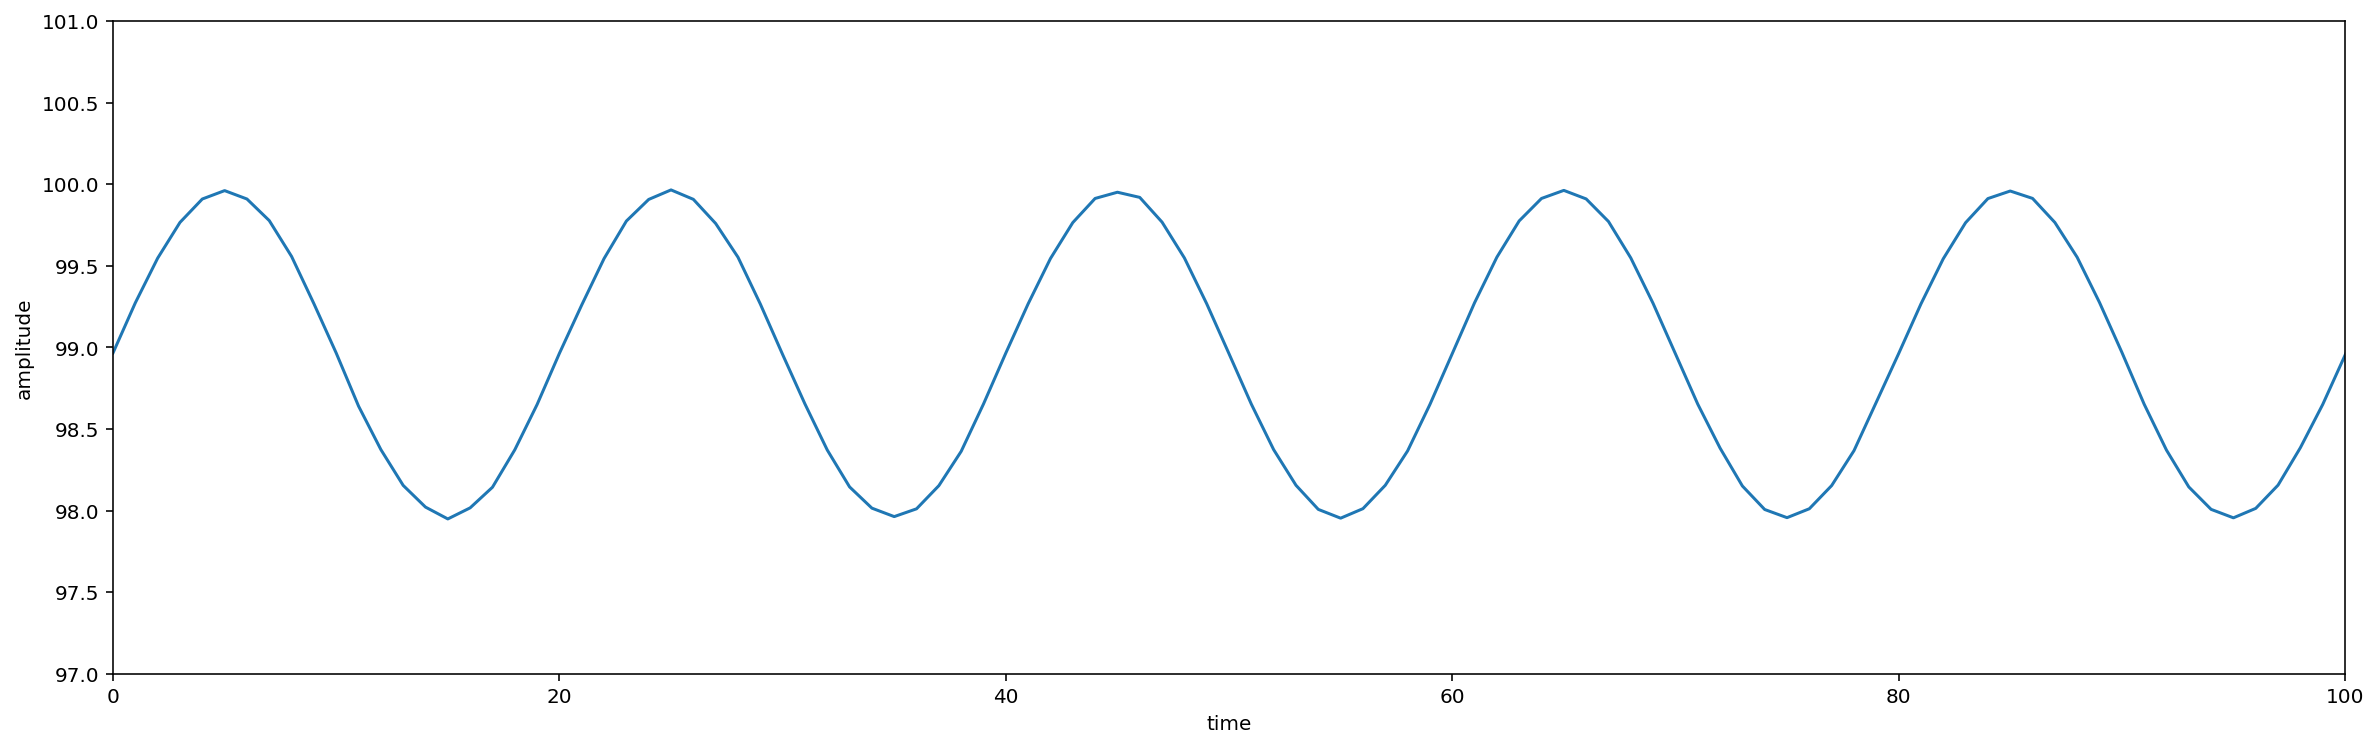

In [137]:
plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

plt.ylim(97,101)
plt.xlim(0,100)

## 0.4 Lose form

In [9]:
#parameters
sigma=50 #50
mu=100 #100
sizeLoss=10000 #10000
#time parameter
x=np.arange(-(time-(time-mu)),(time-mu))
#x=np.arange(-100,10000)
#print(x.size)

#gausian distribution
#ga=((1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2)))
gau=-((1/np.sqrt(2*np.pi*sigma**2))*np.exp((-(x-mu)**2)/(2*sigma**2)))*sizeLoss
print(gau)
print(x)

[-0.02676605 -0.02898951 -0.03138513 ... -0.         -0.
 -0.        ]
[-100  -99  -98 ... 4897 4898 4899]


Text(0, 0.5, 'loss signal data')

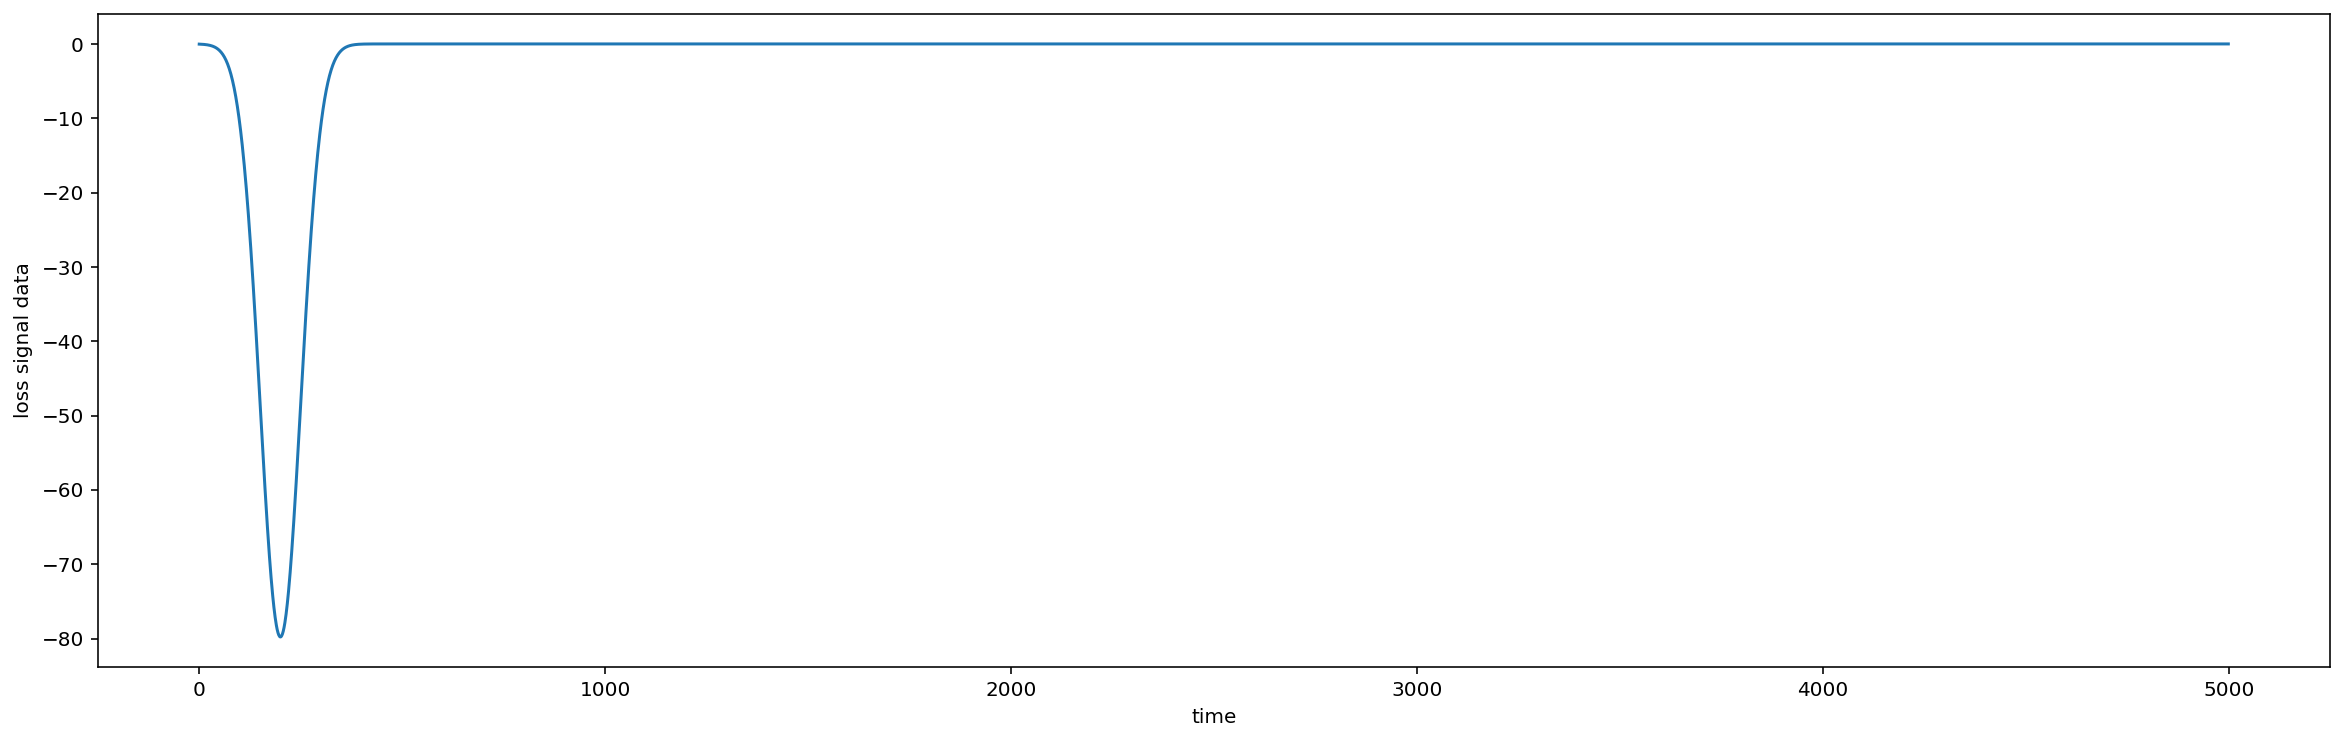

In [102]:
plt.figure(figsize=(20,6))
plt.plot(x,gau)
plt.xlabel('time')
plt.ylabel('loss signal data')

# 0.5 Real signal data

Text(0, 0.5, 'loss signal data')

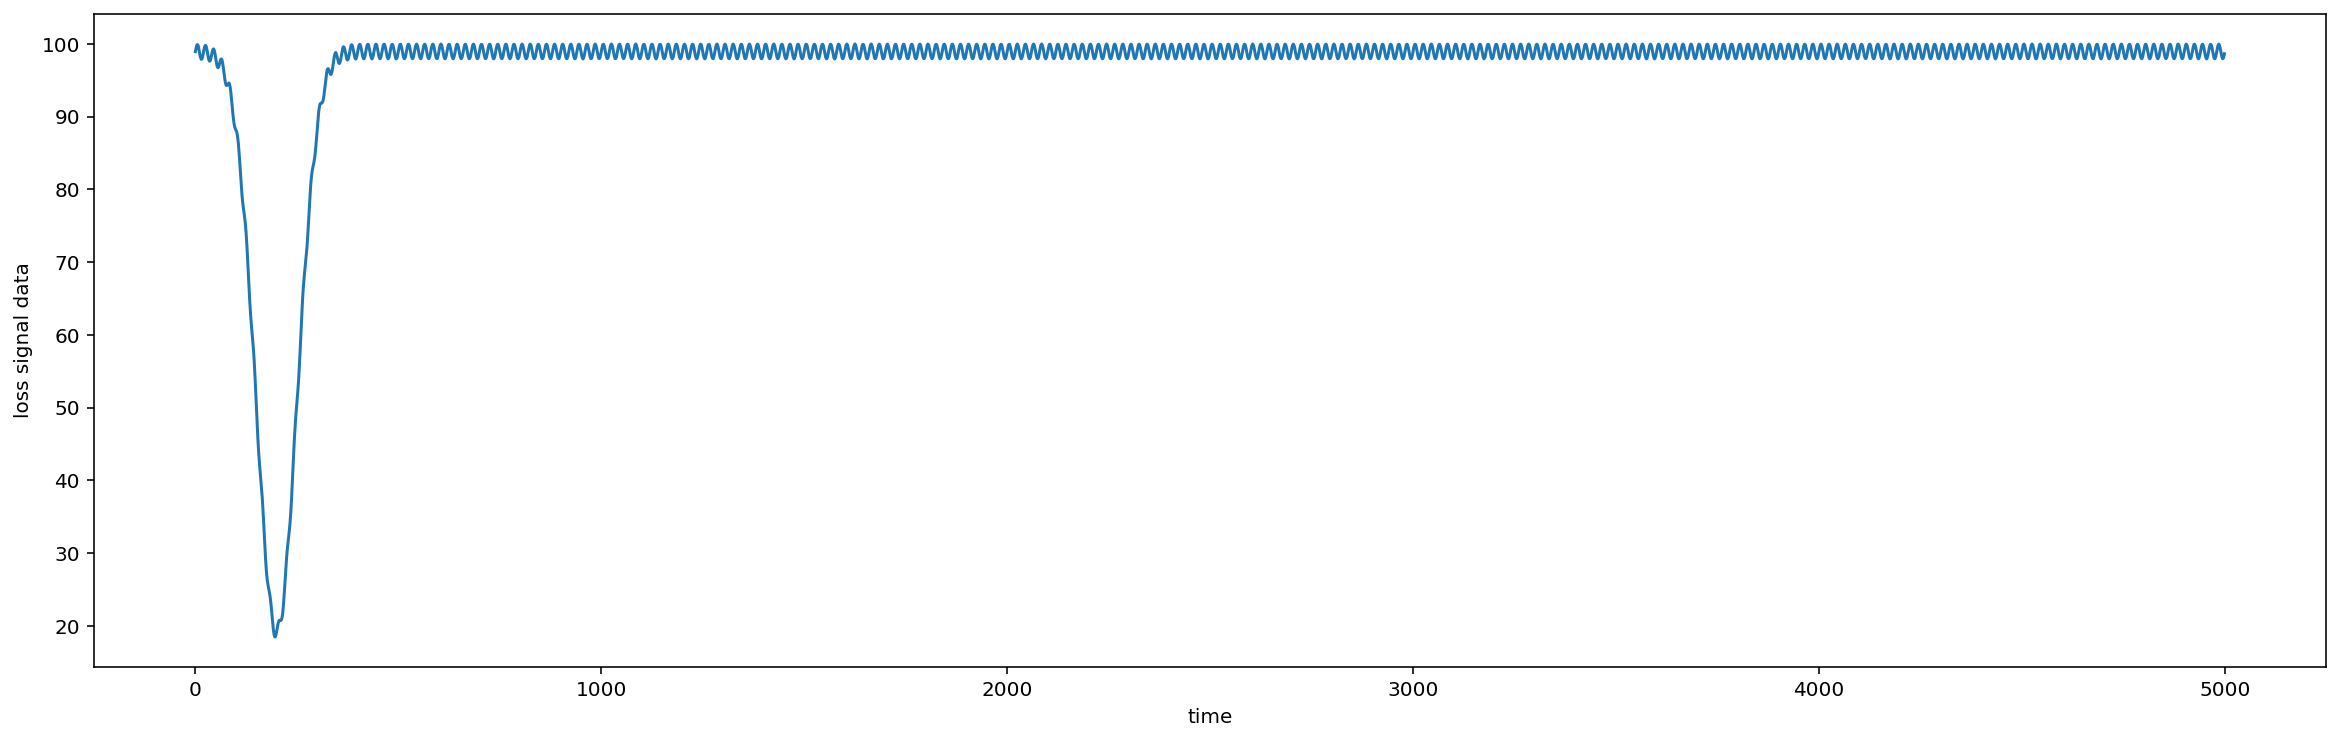

In [101]:
real=at+gau

plt.figure(figsize=(20,6))
plt.plot(real)
plt.xlabel('time')
plt.ylabel('loss signal data')

In [67]:
np.max(real)

3.063873525192163

# 1. Statistical analysis of the signal

## 1.1 Atmos signal data

Text(0, 0.5, 'amplitude')

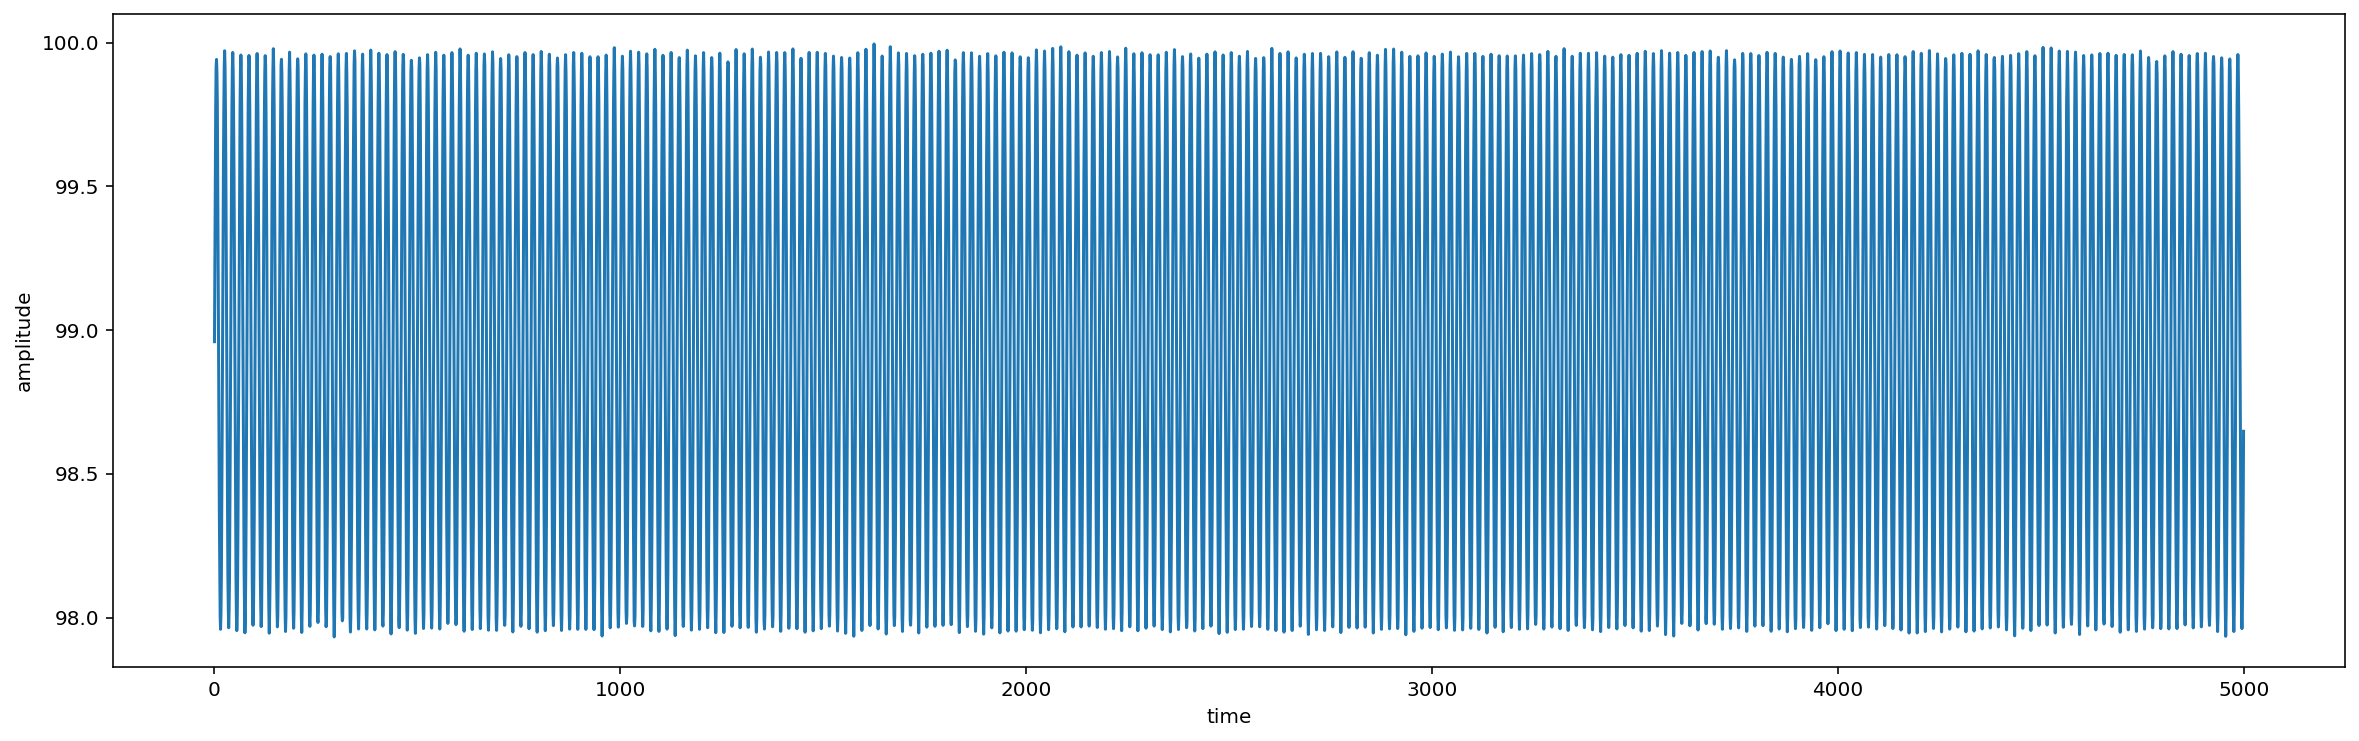

In [107]:
plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

In [203]:
at_max=np.max(at)
at_mean=np.mean(at)
at_min=np.min(at)
at_std=np.std(at)

print('Max of Atmo = '+ str(at_max))
print('Mean of Atmo = '+ str(at_mean))
print('Min of Atmo = '+ str(at_min))
print('Std of Atmo = '+ str(at_std))

Max of Atmo = 99.97914980644113
Mean of Atmo = 98.9599999654729
Min of Atmo = 97.94431779978252
Std of Atmo = 0.7070734613423807


# 1.2 Real signal data

Text(0, 0.5, 'loss signal data')

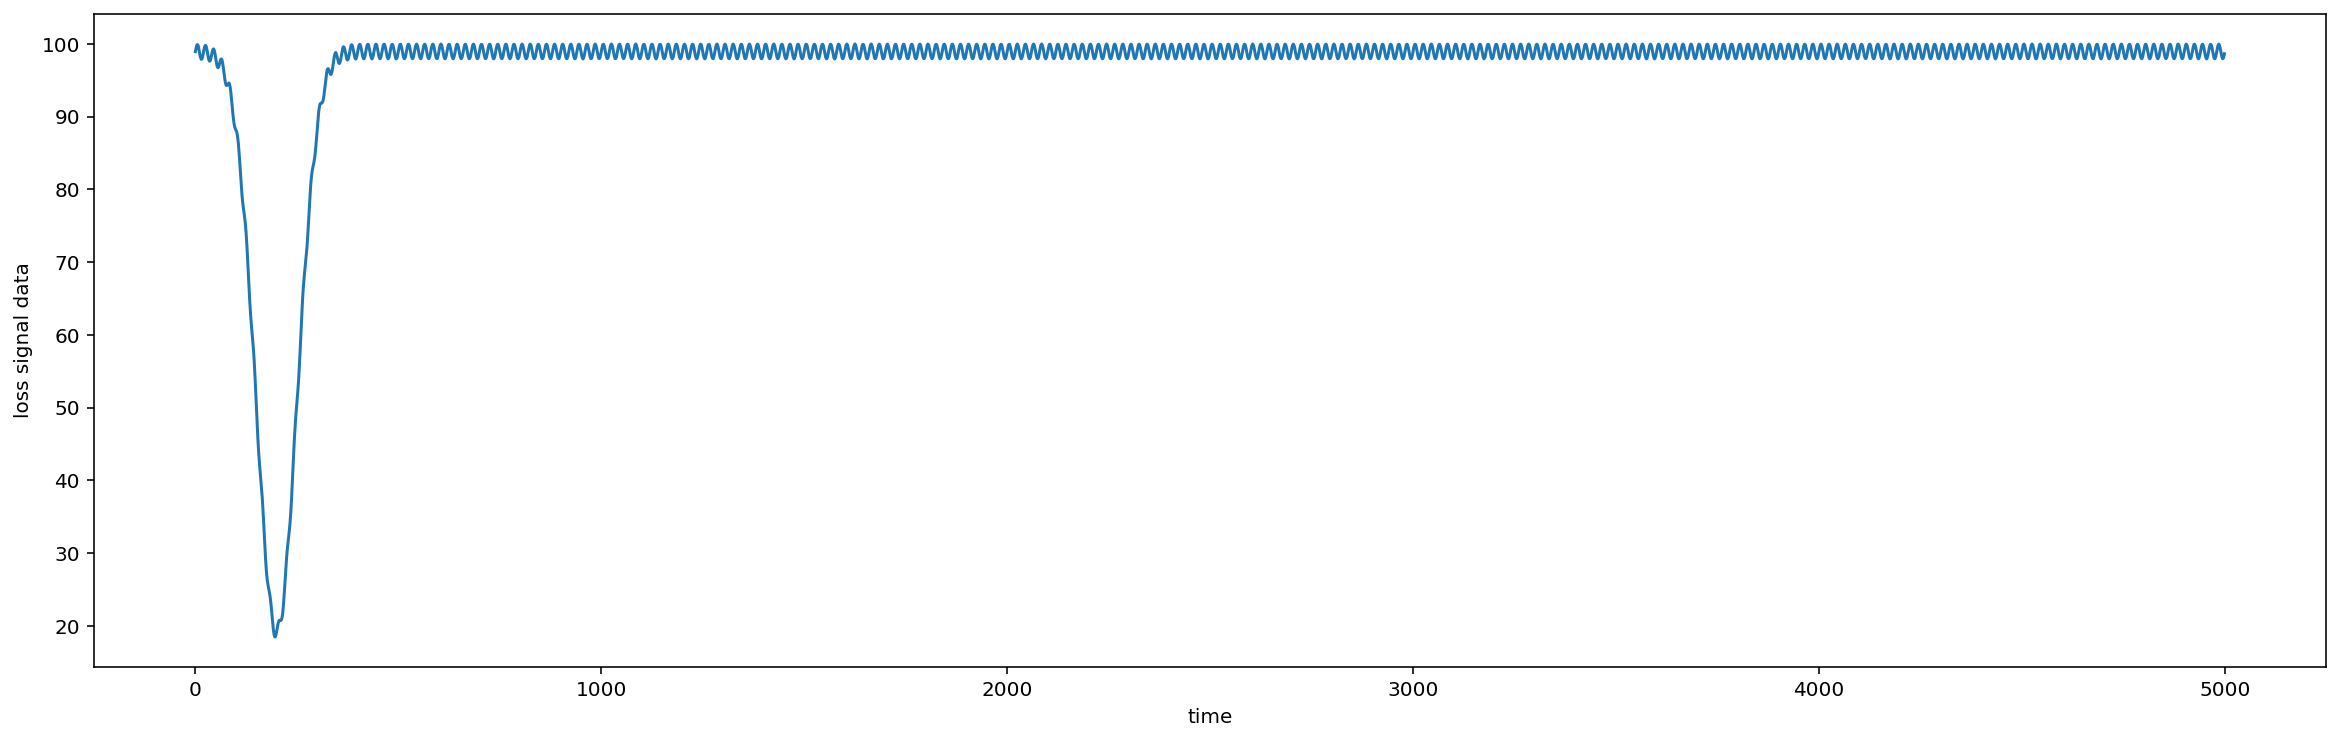

In [104]:
plt.figure(figsize=(20,6))
plt.plot(real)
plt.xlabel('time')
plt.ylabel('loss signal data')

In [105]:
real_max=np.max(real)
real_mean=np.mean(real)
real_min=np.min(real)
real_std=np.std(real)

print('Max of Real signal = '+ str(real_max))
print('Mean of Real signal = '+ str(real_mean))
print('Min of Real signal = '+ str(real_min))
print('Std of Real signal = '+ str(real_std))

Max of Real signal = 99.99607328329915
Mean of Real signal = 96.9610537140459
Min of Real signal = 18.486103884995046
Std of Real signal = 10.456651641800304


# 1.3 Comparing by Graph

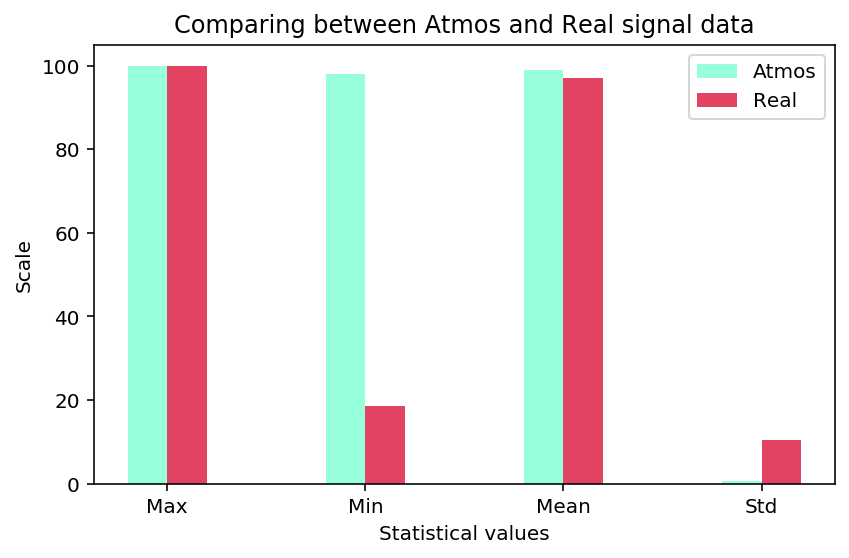

In [178]:
labels=('Max','Min','Mean','Std')
data_at=[at_max, at_min, at_mean, at_std]
data_real=[real_max, real_min, real_mean, real_std]
n_group=4


fig, ax = plt.subplots()
index=np.arange(n_group)
bar_width=.2
opacity=.8

rects1=plt.bar(index, data_at, bar_width, alpha=opacity, color='aquamarine', label='Atmos')
rects2=plt.bar(index+bar_width, data_real, bar_width, alpha=opacity, color='crimson', label='Real')

plt.xlabel('Statistical values')
plt.ylabel('Scale')
plt.title('Comparing between Atmos and Real signal data')
plt.xticks(index+bar_width-.1, labels)
plt.legend()

plt.tight_layout()
plt.show()

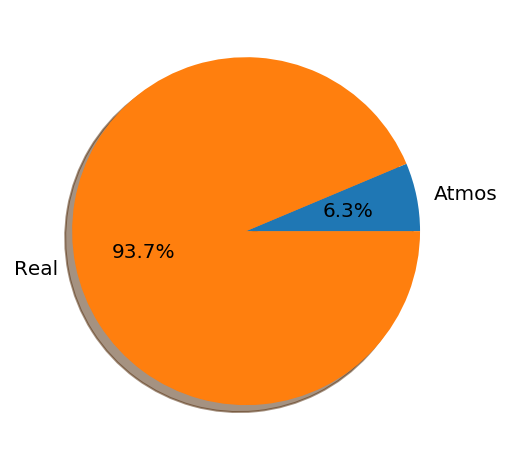

In [198]:
plt.pie([at_std,real_std],labels=['Atmos','Real'],shadow=True, autopct = '%1.1f%%')
ax1.axis('equal')  
plt.show()

# 1.4 Distribution

In [200]:
import seaborn as sns

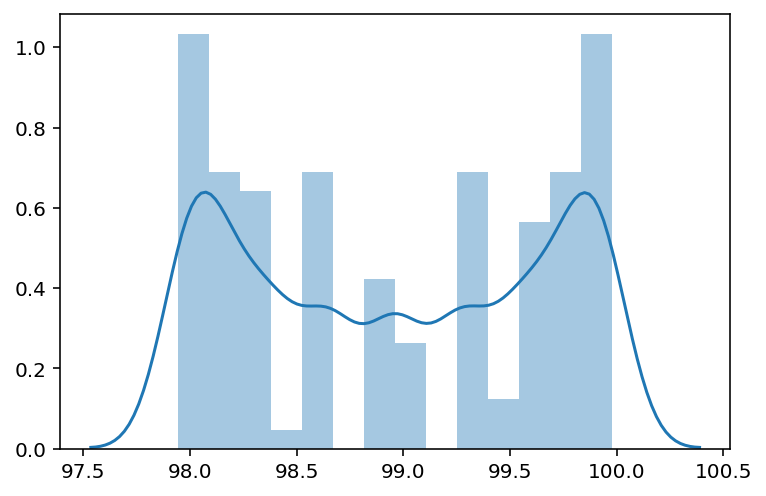

In [202]:
sns.distplot(at)

In [215]:
print('Skewness =' +str(skew(at)))
print('Kurtosis =' +str(kurtosis(at)))

Skewness =0.00015100421335420832
Kurtosis =-1.4999928774444438


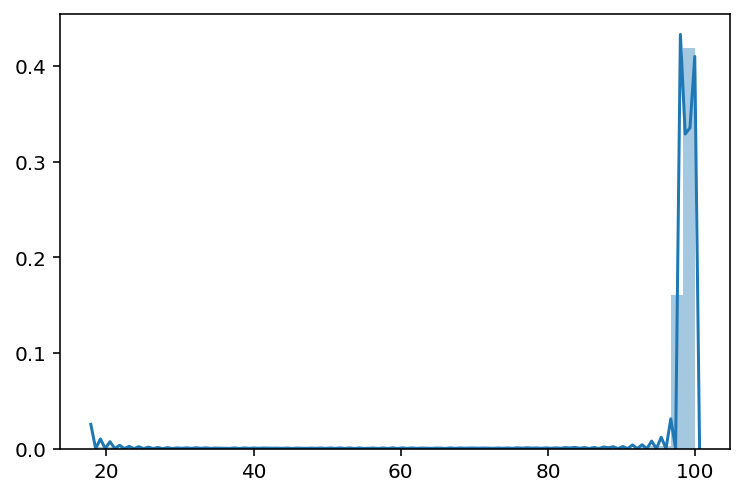

In [201]:
sns.distplot(real)

In [214]:
from scipy.stats import skew , kurtosis

print('Skewness =' +str(skew(real)))
print('Kurtosis =' +str(kurtosis(real)))

Skewness =-5.851482652157482
Kurtosis =34.81917147427304


# 2. Classification by Machine learning